In [43]:

###################################################################################################
#I)Import Packages
#import pypyodbc
import pandas as pd
import numpy as np
import itertools
import math
import random
import timeit
import statistics
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import norm
import scipy.stats as ss


# set visualization of dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [59]:
y = [1,2,3,4,5,10,3,5,3,1]


def best_fiting_distribution(y):
    lnspc = np.linspace(xmin, xmax, len(y))
    dist_names = ['gamma','lognorm', 'norm','triang','uniform','laplace']
    distribution_names = []
    parameters = []
    square_errors =[]
    chisquare_stat = []
    chisquare_pval= []
    y_array = []
    for dist_name in dist_names:
        print(dist_name)
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(y)
        print(param)
        pdf_fitted = dist.pdf(lnspc, *param[:-2], param[-2], param[-1])
        sse = np.sum(np.power(y - pdf_fitted, 2.0))
        print(sse)
        distribution_names.append(dist_name)
        parameters.append(param)
        square_errors.append(sse)
        y_array.append(pdf_fitted)
    
    df = pd.DataFrame(columns = ['distribution_name','parameters','sse'])
    df['distribution_name'] = distribution_names
    df['parameters'] = parameters
    df['sse'] = square_errors
    df['pdf'] = y_array
    best_distribution_risk = df[df['sse'] == df['sse'].min()]

    return df, best_distribution_risk

In [60]:
df, best_distribution_risk = best_fiting_distribution(y)

gamma
(0.666523387220632, 0.9999999999999998, 2.704746401512935)
3987095810.934494
lognorm
(0.6851162132893117, 0.0156080102784994, 2.9535610897850013)
1949.8586429790284
norm
(3.7, 2.4919871588754225)
1938.26912589649
triang
(0.9999997660469166, 0.09396471578060425, 9.906043868719062)
1983.778141500266
uniform
(1.0, 9.0)
1989.79012345679
laplace
(3.0, 1.7)
1939.6578930495734


In [61]:
df

,distribution_name,parameters,sse,pdf
0,gamma,"(0.666523387220632, 0.9999999999999998, 2.7047...",3.987096e+09,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,lognorm,"(0.6851162132893117, 0.0156080102784994, 2.953...",1.949859e+03,"[0.0, 0.0, 5.768427802837143e-18, 3.8632681171..."
2,norm,"(3.7, 2.4919871588754225)",1.938269e+03,"[0.05316933760945543, 0.05348985285503354, 0.0..."
3,triang,"(0.9999997660469166, 0.09396471578060425, 9.90...",1.983778e+03,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,uniform,"(1.0, 9.0)",1.989790e+03,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,laplace,"(3.0, 1.7)",1.939658e+03,"[0.05036386557199652, 0.05066400691262722, 0.0..."


In [62]:
best_distribution_risk

,distribution_name,parameters,sse,pdf
2,norm,"(3.7, 2.4919871588754225)",1938.269126,"[0.05316933760945543, 0.05348985285503354, 0.0..."


In [27]:
y = [1,2,3,4,5,3,2,1,10,12,3,4]
number_of_runs = 10**6

In [46]:
def monte_carlo(input_values, number_of_runs): 
    list_random = []
    for j in range(0,number_of_runs):
        ra = 0
        for i in range(0,len(input_values)):
            ra = ra + random.choices(input_values)[0]
        list_random.append(ra)
    norm_fit = norm.fit(list_random)
    mu, sigma = norm_fit[0], norm_fit[1] 
    mc_distribution = np.random.normal(mu, sigma, number_of_runs)
    return mc_distribution

In [49]:
mc_distribution = monte_carlo(y,number_of_runs)

([], [])

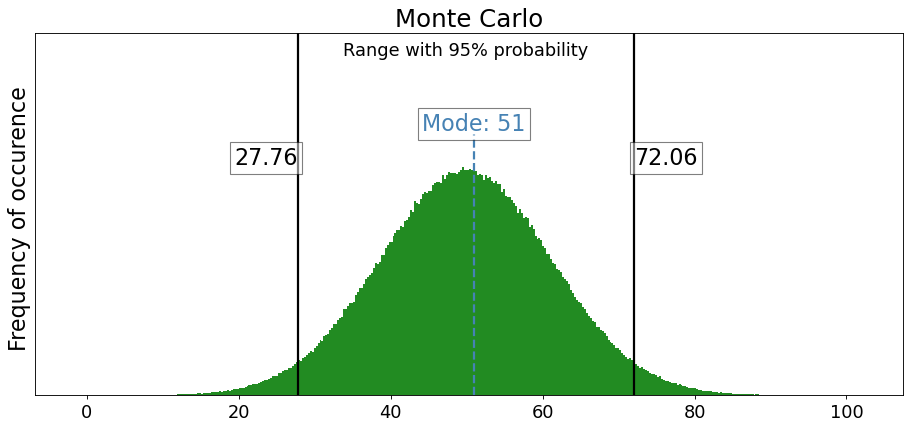

In [37]:

figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
mean = statistics.mean(mc)
median = statistics.median(mc)
data = list(map(round, mc))
freq = Counter(data)
mostfreq = freq.most_common()
modes = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))#
mode = modes[0][0]
stdevmc = statistics.stdev(mc)
upper = np.percentile(mc, 97.5)
lower = np.percentile(mc, 2.5)
freq_mode = (mostfreq[0][1]/number_of_runs )
_,_, bars = plt.hist(mc, color='lightcoral', bins=400,
                  density=True)
for bar in bars:
    bar.set_facecolor("forestgreen")
plt.axvline(mode, color='steelblue', linestyle='dashed', linewidth=2, ymax = 0.72)
plt.axvline(upper, color='black', linewidth=2)
plt.axvline(lower, color='black', linewidth=2)

plt.ylabel("Frequency of occurence ", fontsize=20)
plt.title(f"Monte Carlo", fontsize=22)
plt.tick_params(axis='x', labelsize=16)
#------------------------------------------------ REPLACE MODE WITH MEDIAN OR MEAN
plt.text(mode,freq_mode*1.17,f'Mode: {mode}',rotation=360,bbox=dict(facecolor='white', alpha=0.5),color='steelblue',fontsize=20,ha='center')
#------------------------------------------------ REPLACE MODE WITH MEDIAN OR MEAN
plt.text(upper,freq_mode*1.02,f'{round(upper,2)}',rotation=360,bbox=dict(facecolor='white', alpha=0.5),color='black',fontsize=20,ha='left')
plt.text(lower,freq_mode*1.02,f'{round(lower,2)}',rotation=360,bbox=dict(facecolor='white', alpha=0.5),color='black',fontsize=20,ha='right')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,(mostfreq[0][1]/number_of_runs )*1.6))
plt.annotate('Range with 95% probability',xy=((upper+lower)/2, freq_mode*1.5),ha='center', fontsize=16)
#plt.annotate(
#    'Range with 95% probability', xy=(lower, freq_mode*1.5), xycoords='data',
#    xytext=(upper, freq_mode*1.5), textcoords='offset points',va='center',color='black')
plt.yticks([])